# Clustering Total Lubmarine

Le but de l'entreprise est de créer une nouvelle offre.

## Sommaire

- récupération de la donnée
- exploration
- data engeneering
- models
- conclusion

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df_orders = pd.read_csv("src/olist_orders_dataset.csv")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
df_items = pd.read_csv("src/olist_order_items_dataset.csv")
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
df_products = pd.read_csv("src/olist_products_dataset.csv")
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
df_payments = pd.read_csv("src/olist_order_payments_dataset.csv")
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
df_reviews = pd.read_csv("src/olist_order_reviews_dataset.csv")
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
df_sellers = pd.read_csv("src/olist_sellers_dataset.csv")
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
df_customers = pd.read_csv("src/olist_customers_dataset.csv")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Data exploration

### Missing data

<AxesSubplot:>

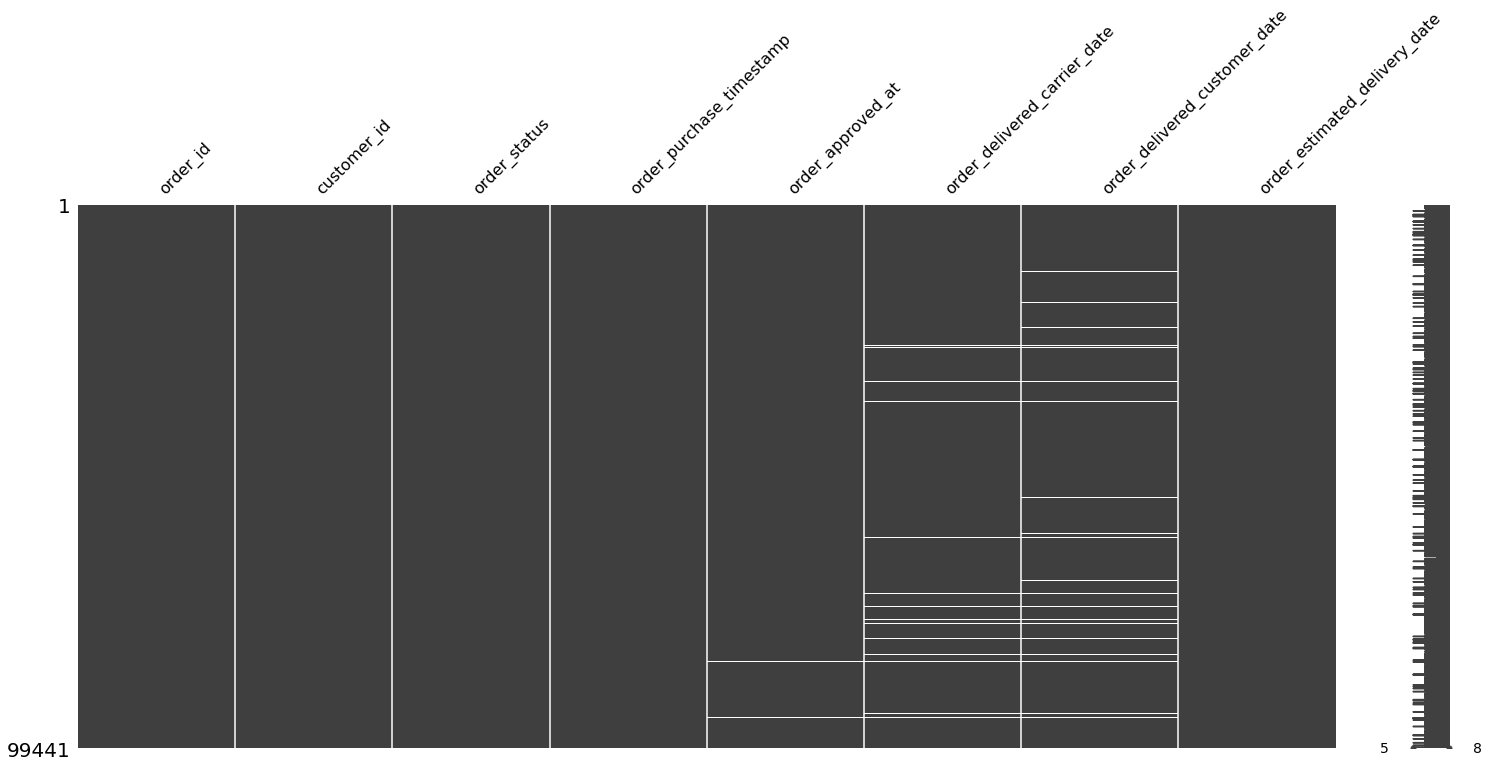

In [9]:
msno.matrix(df_orders)

On observe des données manquantes dans les colonnes order_approved, order_delivered_carrier_date et order_delivered_customer_date.
Je vais drop les lignes avec des données manquantes.

In [10]:
df_orders = df_orders.dropna()

<AxesSubplot:>

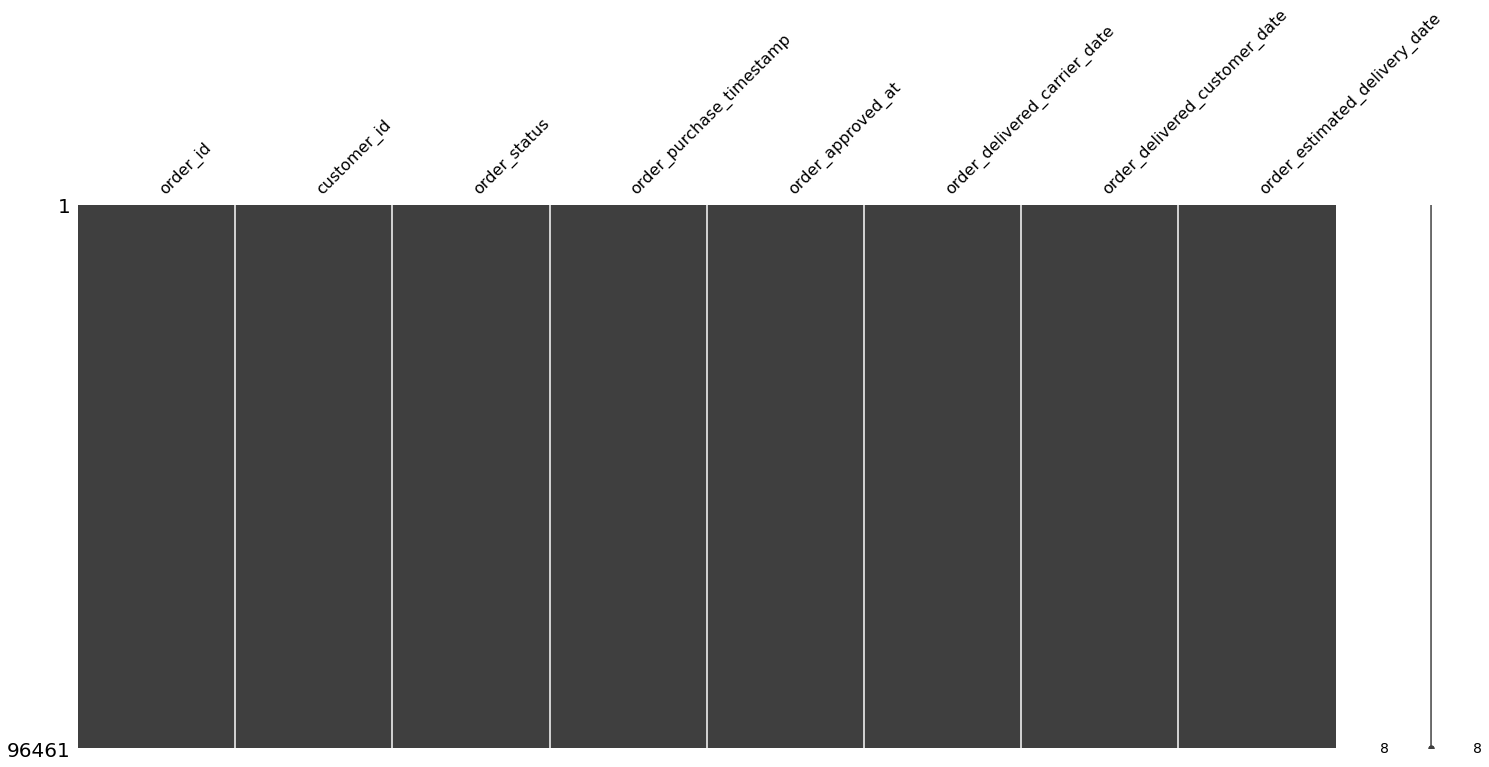

In [11]:
msno.matrix(df_orders)

<AxesSubplot:>

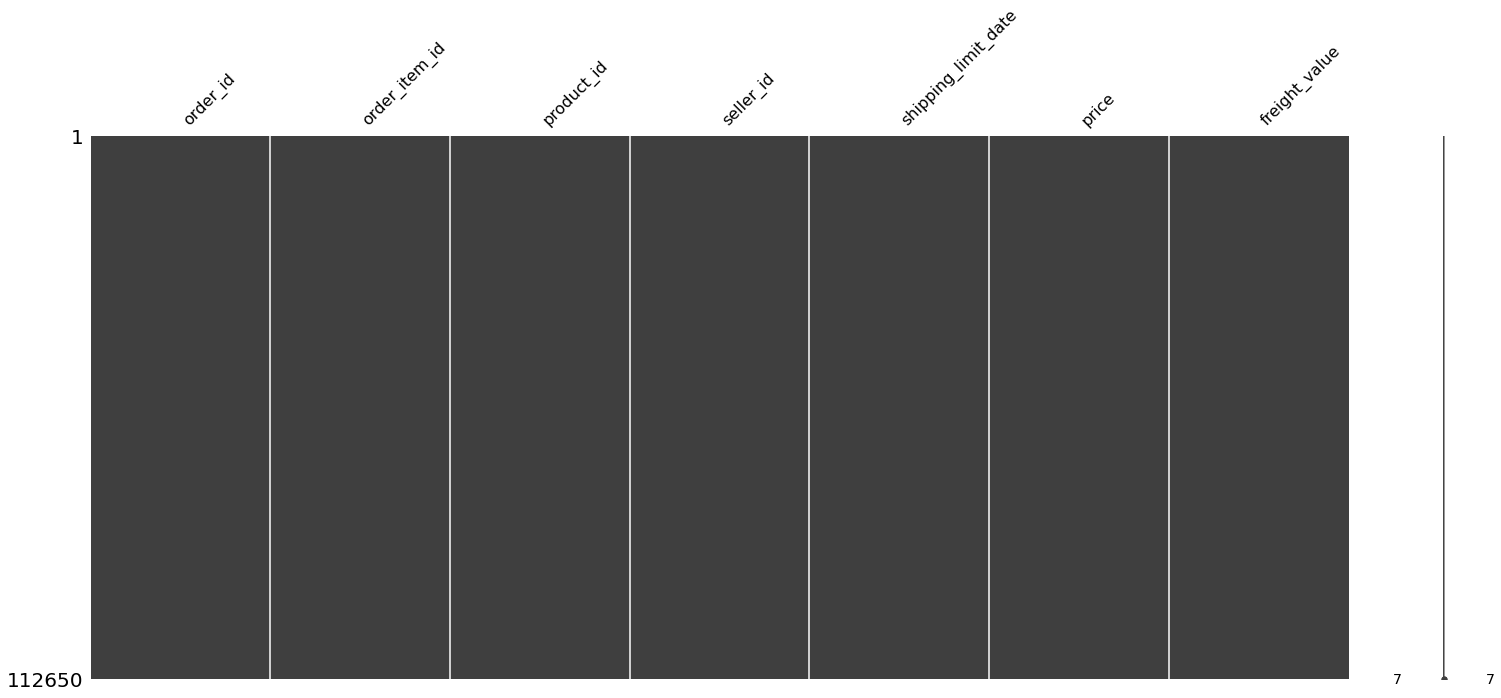

In [12]:
msno.matrix(df_items)

Il n'y a pas de données manquantes dans ce dataframe

<AxesSubplot:>

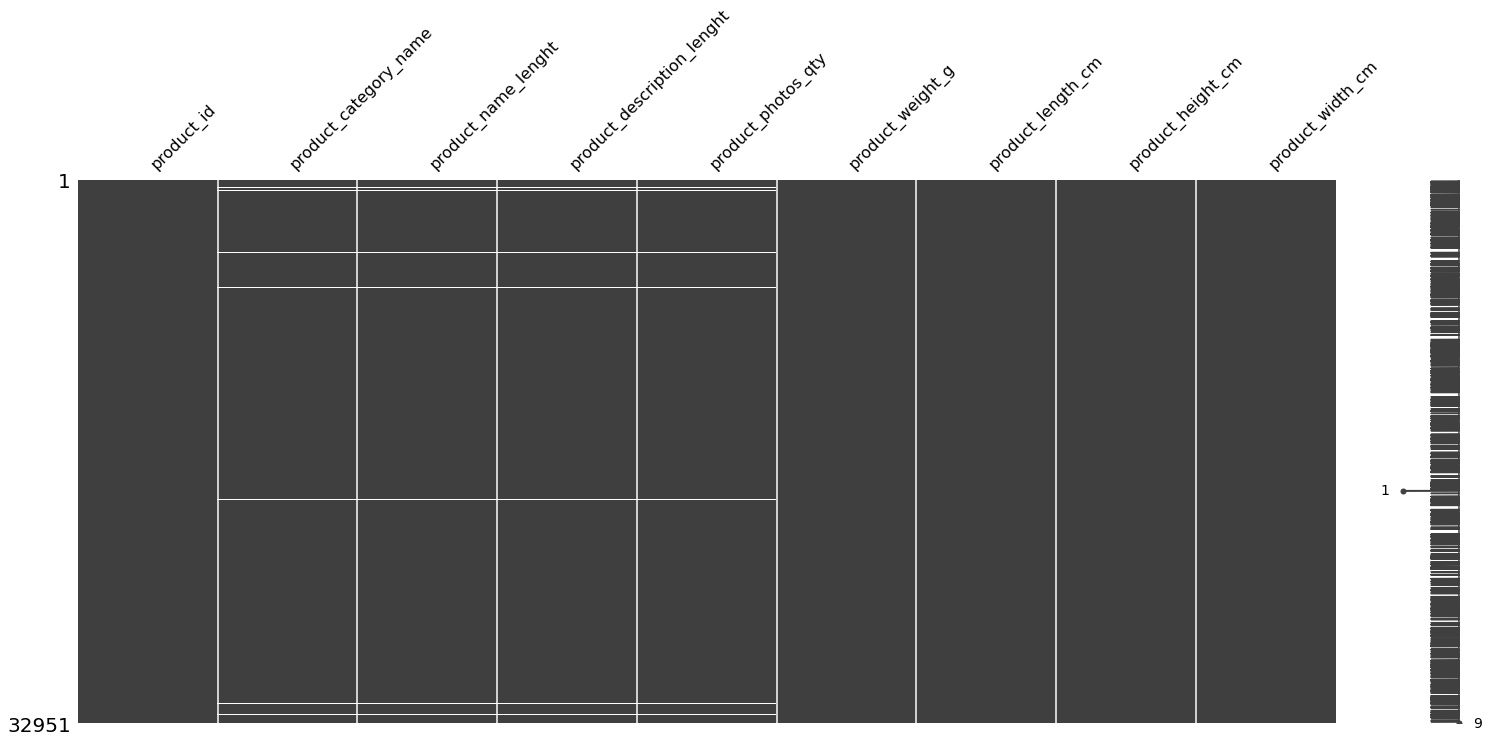

In [13]:
msno.matrix(df_products)

On observe des données manquantes dans les colonnes product_category_name, product_name_lenght, product_description_lenght et product_photos_qty.
Je vais drop les lignes avec des données manquantes ne pouvant générer les éléments présent dans certaines des colonnes.

In [14]:
df_products = df_products.dropna()

<AxesSubplot:>

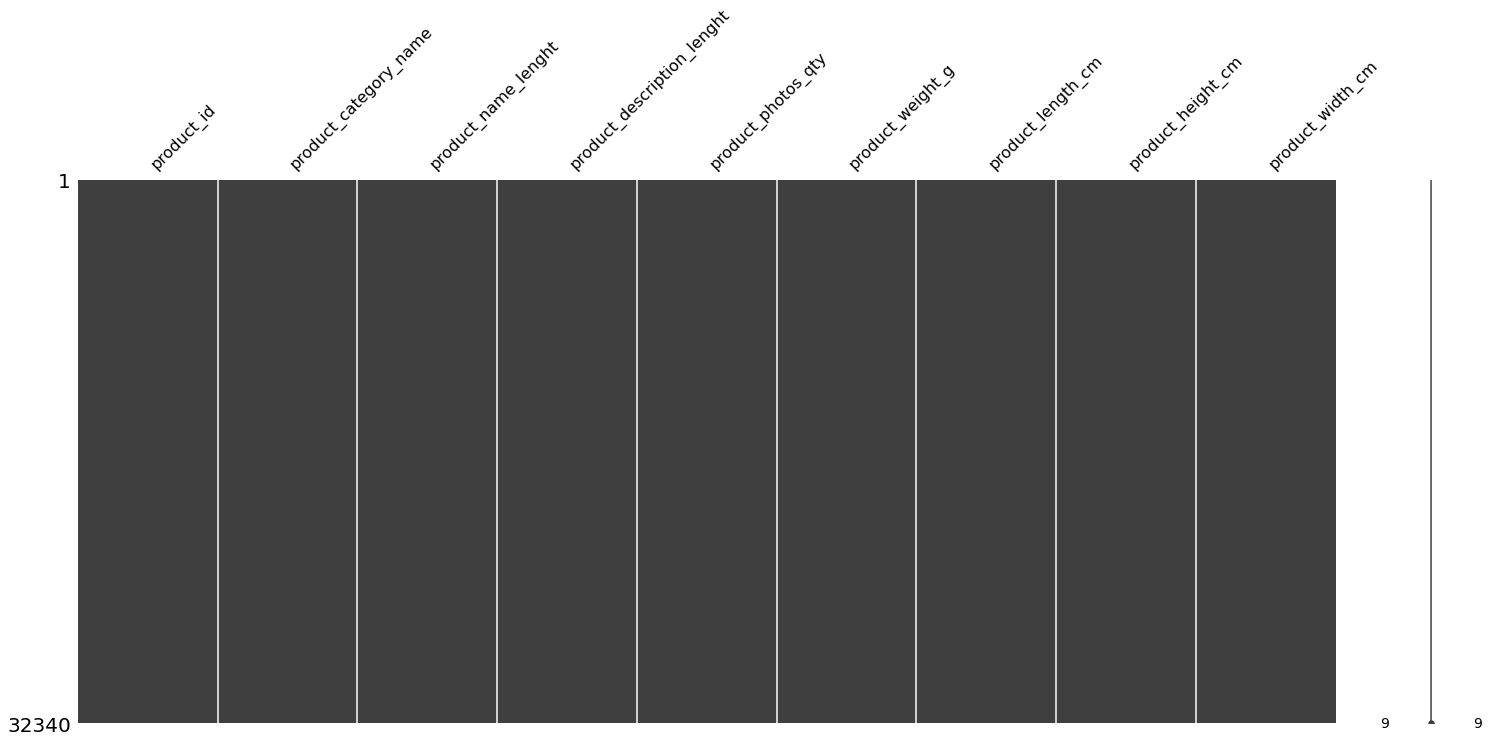

In [15]:
msno.matrix(df_products)

<AxesSubplot:>

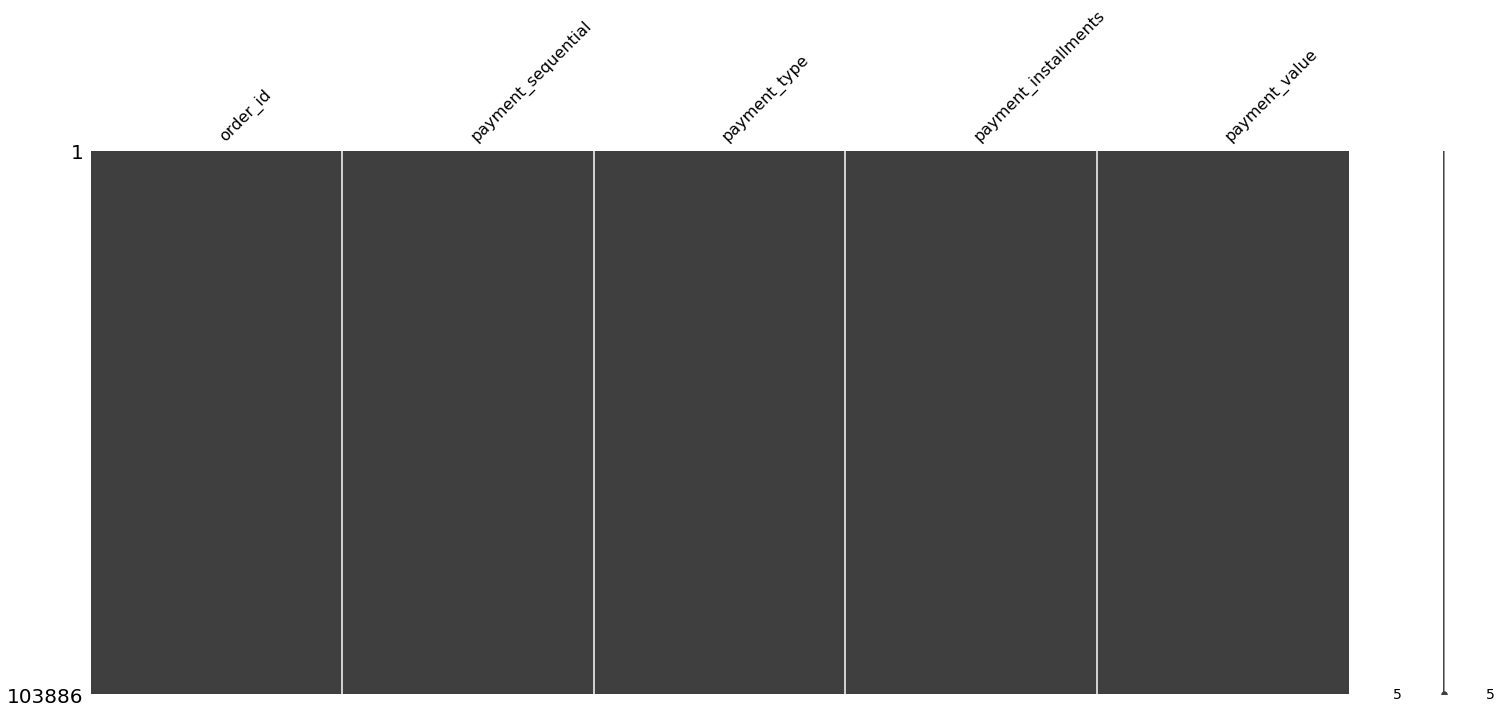

In [16]:
msno.matrix(df_payments)

Il n'y a pas de données manquantes dans ce dataframe

<AxesSubplot:>

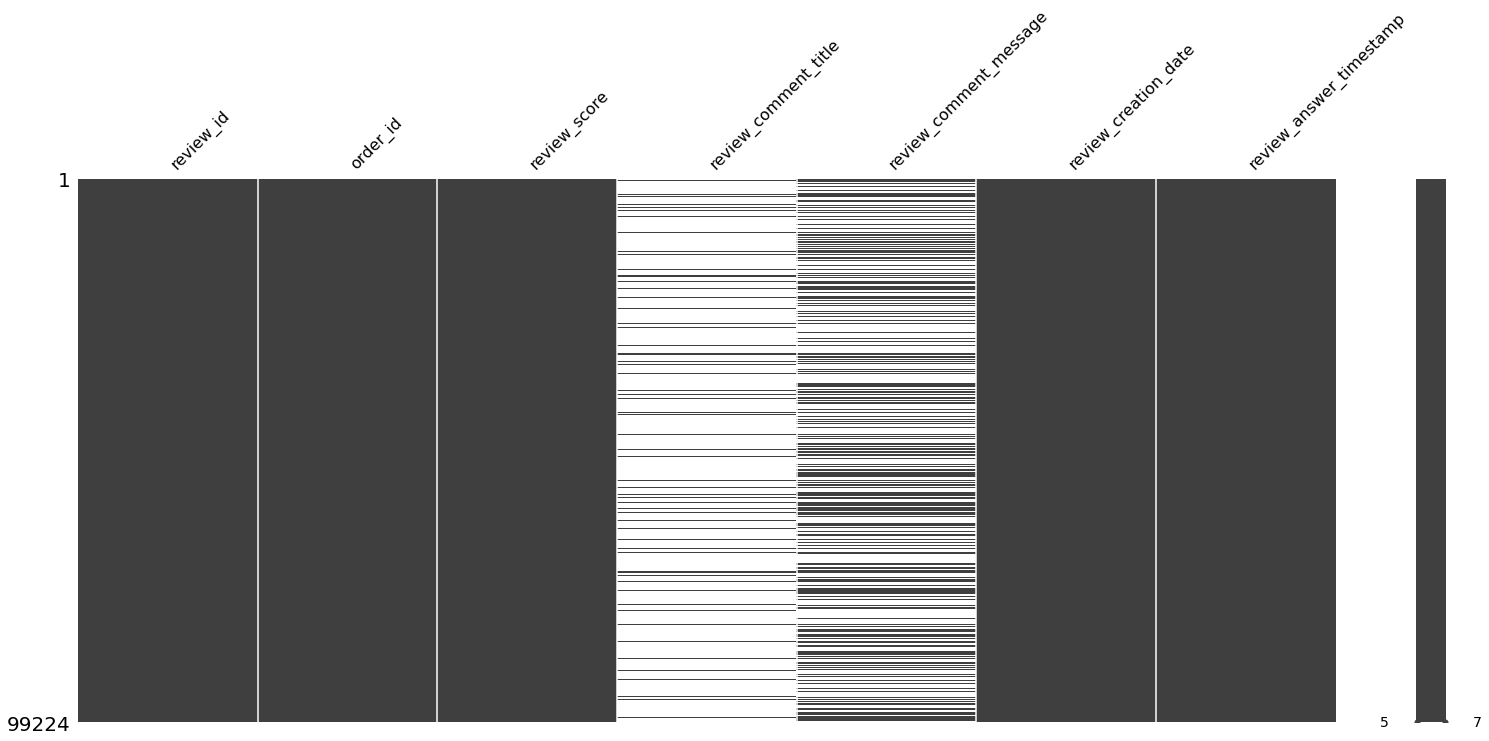

In [17]:
msno.matrix(df_reviews)

On observe un manque important de données manquantes dans les colonnes review_comment_title et review_comment_message.
Je vais drop ces 2 colonnes car générer de nouvelles données risquerait de biaiser le model

In [18]:
df_reviews = df_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

<AxesSubplot:>

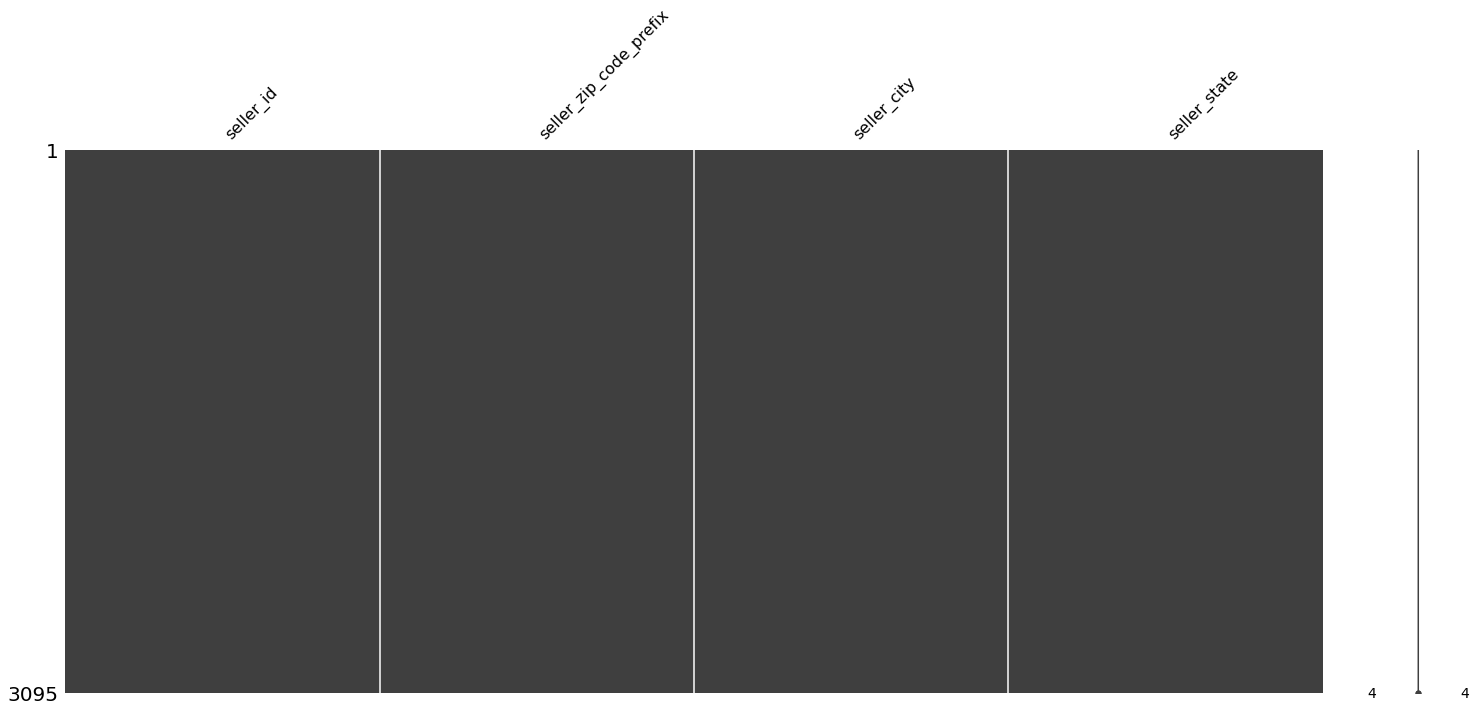

In [19]:
msno.matrix(df_sellers)

Il n'y a pas de données manquante dans ce dataframe

<AxesSubplot:>

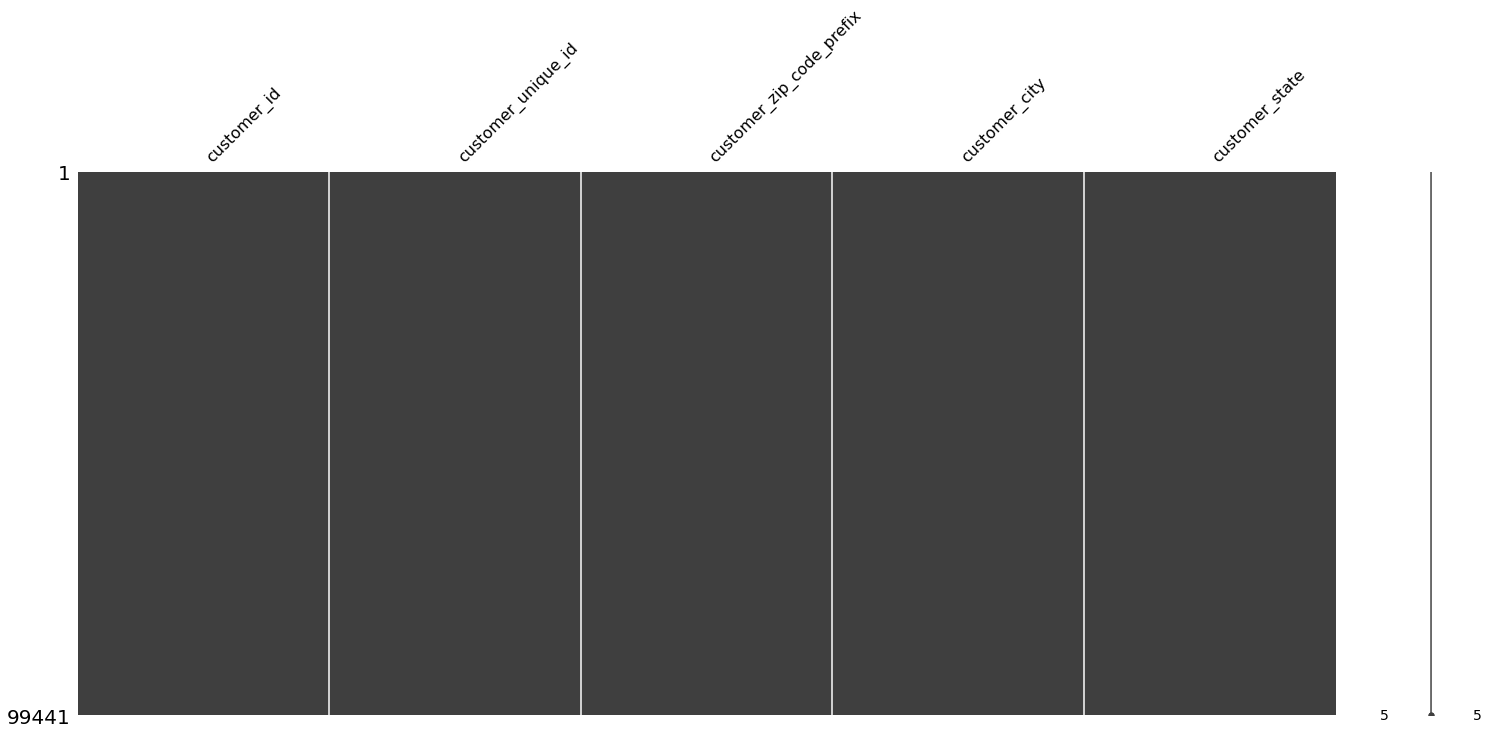

In [20]:
msno.matrix(df_customers)

Il n'y a pas de données manquantes dans ce dataframe

N'utilisant pas la géolocalisation je vais drop les zip code des sellers et customers

In [21]:
df_sellers = df_sellers.drop(columns=['seller_zip_code_prefix'])

In [22]:
df_customers = df_customers.drop(columns=['customer_zip_code_prefix'])

### Dataset join

In [23]:
df_final = df_items.set_index('seller_id').join(df_sellers.set_index('seller_id'), on='seller_id')

In [24]:
df_final

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,seller_city,seller_state
seller_id,,,,,,,,
48436dade18ac8b2bce089ec2a041202,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP
dd7ddc04e1b6c2c614352b383efe2d36,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP
5b51032eddd242adc84c38acab88f23d,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG
9d7a1d34a5052409006425275ba1c2b4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,franca,SP
df560393f3a51e74553ab94004ba5c87,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,loanda,PR
...,...,...,...,...,...,...,...,...
b8bc237ba3788b23da09c0f1f3a3288c,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02 04:11:01,299.99,43.41,itajai,SC
f3c38ab652836d21de61fb8314b69182,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP
c3cfdc648177fdbbbb35635a37472c53,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,2017-10-30 17:14:25,99.90,16.95,curitiba,PR


In [25]:
df_final = df_final.set_index('product_id').join(df_products.set_index('product_id'), on='product_id')

In [26]:
df_final

,order_id,order_item_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,,,,,,,,
4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4aa6014eceb682077f9dc4bffebc05b0,fffc94f6ce00a00581880bf54a75a037,1,2018-05-02 04:11:01,299.99,43.41,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
32e07fd915822b0765e448c4dd74c828,fffcd46ef2263f404302a634eb57f7eb,1,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
72a30483855e2eafc67aee5dc2560482,fffce4705a9662cd70adb13d4a31832d,1,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0


In [27]:
df_final = df_final.set_index('order_id').join(df_orders.set_index('order_id'), on='order_id')

In [28]:
df_final

,order_item_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,cool_stuff,58.0,598.0,4.0,...,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,pet_shop,56.0,239.0,2.0,...,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,...,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,franca,SP,perfumaria,42.0,480.0,1.0,...,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,...,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,2018-05-02 04:11:01,299.99,43.41,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,...,89.0,15.0,40.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
fffcd46ef2263f404302a634eb57f7eb,1,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,...,45.0,26.0,38.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
fffce4705a9662cd70adb13d4a31832d,1,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,esporte_lazer,43.0,869.0,1.0,...,21.0,24.0,19.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00


In [29]:
df_final = df_final.join(df_payments.set_index('order_id'), on='order_id')

In [30]:
df_final

,order_item_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,cool_stuff,58.0,598.0,4.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19
00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,pet_shop,56.0,239.0,2.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83
000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,franca,SP,perfumaria,42.0,480.0,1.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,2018-05-02 04:11:01,299.99,43.41,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,...,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,1.0,boleto,1.0,343.40
fffcd46ef2263f404302a634eb57f7eb,1,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,...,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,1.0,boleto,1.0,386.53
fffce4705a9662cd70adb13d4a31832d,1,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,esporte_lazer,43.0,869.0,1.0,...,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,1.0,credit_card,3.0,116.85


In [31]:
df_final = df_final.join(df_reviews.set_index('order_id'), on='order_id')

In [32]:
df_final

,order_item_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,cool_stuff,58.0,598.0,4.0,...,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21 00:00:00,2017-09-22 10:57:03
00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,pet_shop,56.0,239.0,2.0,...,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13 00:00:00,2017-05-15 11:34:13
000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,...,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23 00:00:00,2018-01-23 16:06:31
00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,franca,SP,perfumaria,42.0,480.0,1.0,...,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15 00:00:00,2018-08-15 16:39:01
00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,...,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,2018-05-02 04:11:01,299.99,43.41,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,...,2018-05-10 22:56:40,2018-05-18 00:00:00,1.0,boleto,1.0,343.40,9185f849f32d82e216a4e025e0c50f5c,5.0,2018-05-11 00:00:00,2018-05-14 12:53:47
fffcd46ef2263f404302a634eb57f7eb,1,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,...,2018-07-23 20:31:55,2018-08-01 00:00:00,1.0,boleto,1.0,386.53,be803f6a93d64719fd685c1cc610918a,5.0,2018-07-24 00:00:00,2018-07-25 09:25:29
fffce4705a9662cd70adb13d4a31832d,1,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,esporte_lazer,43.0,869.0,1.0,...,2017-10-28 12:22:22,2017-11-10 00:00:00,1.0,credit_card,3.0,116.85,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,2017-10-29 00:00:00,2017-10-29 21:33:52


In [33]:
df_final = df_final.set_index('customer_id').join(df_customers.set_index('customer_id'), on='customer_id')

In [34]:
df_final

,order_item_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_city,customer_state
customer_id,,,,,,,,,,,,,,,,,,,,,
3ce436f183e68e07877b285a838db11a,1,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,cool_stuff,58.0,598.0,4.0,...,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
f6dd3ec061db4e3987629fe6b26e5cce,1,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,pet_shop,56.0,239.0,2.0,...,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,...,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-15 10:10:18,12.99,12.79,franca,SP,perfumaria,42.0,480.0,1.0,...,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-13 13:57:51,199.90,18.14,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,...,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51593916b4b8e0d6f66f2ae24f2673d,1,2018-05-02 04:11:01,299.99,43.41,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,...,boleto,1.0,343.40,9185f849f32d82e216a4e025e0c50f5c,5.0,2018-05-11 00:00:00,2018-05-14 12:53:47,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
84c5d4fbaf120aae381fad077416eaa0,1,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,...,boleto,1.0,386.53,be803f6a93d64719fd685c1cc610918a,5.0,2018-07-24 00:00:00,2018-07-25 09:25:29,0da9fe112eae0c74d3ba1fe16de0988b,curitiba,PR
29309aa813182aaddc9b259e31b870e6,1,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,esporte_lazer,43.0,869.0,1.0,...,credit_card,3.0,116.85,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,2017-10-29 00:00:00,2017-10-29 21:33:52,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP


Une fois mes join effectué je vais faire un missingno pour vérifer si je n'ai pas créer de données manquantes

<AxesSubplot:>

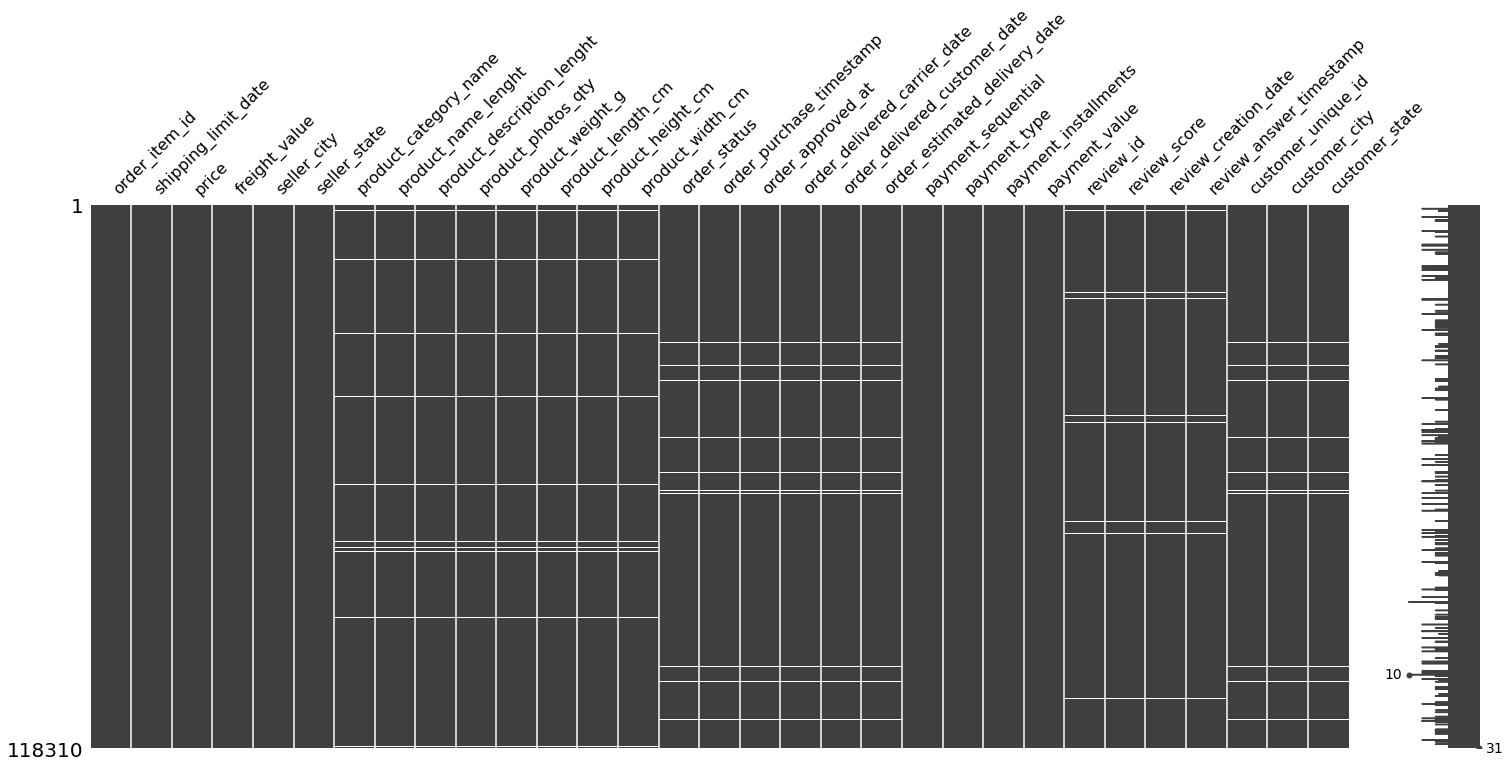

In [35]:
msno.matrix(df_final)

Il y a encore des données manquantes, je vais les drops pour ne pas avoir à créer des données temporels

In [36]:
df_final = df_final.dropna()

<AxesSubplot:>

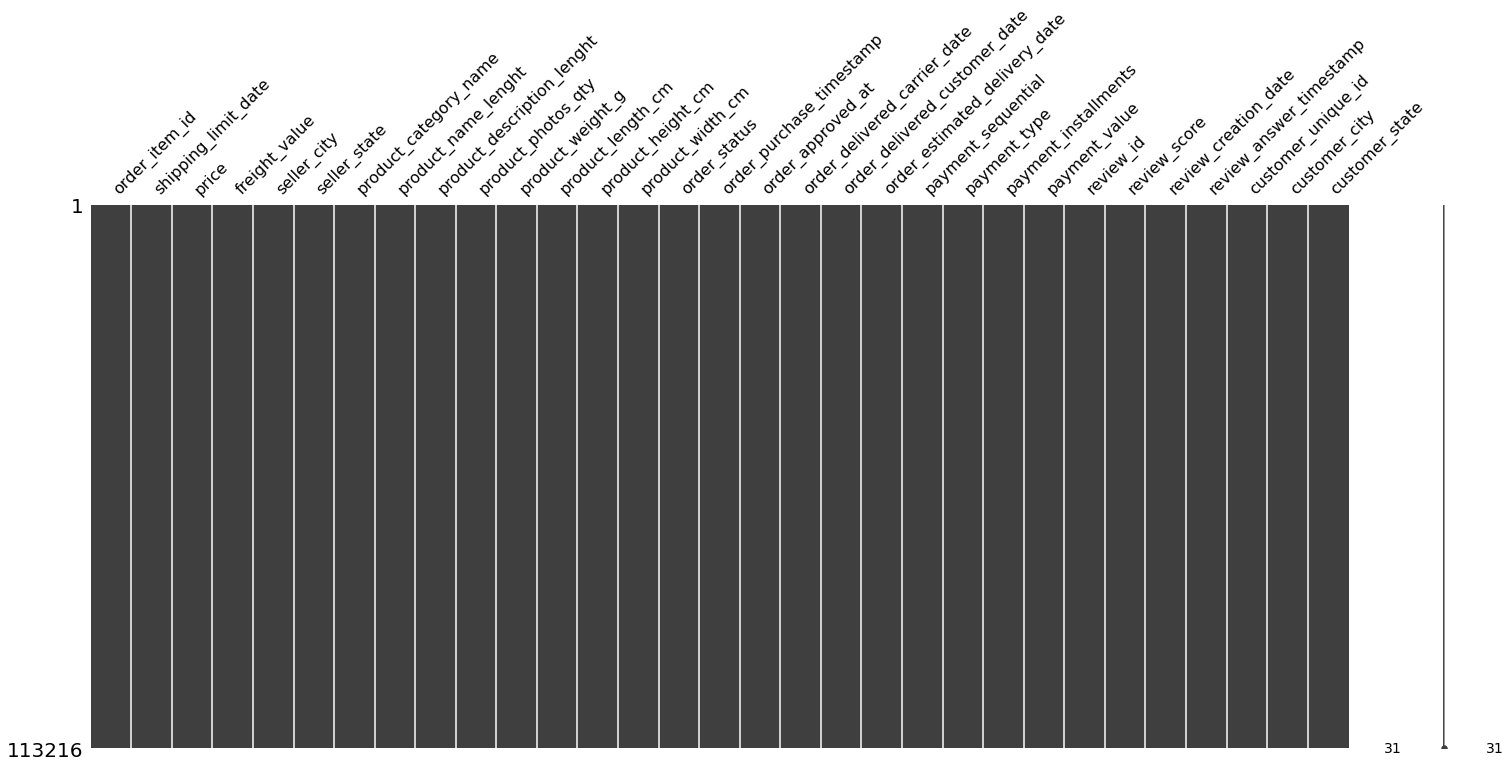

In [37]:
msno.matrix(df_final)

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113216 entries, 3ce436f183e68e07877b285a838db11a to 96d649da0cc4ff33bb408b199d4c7dcf
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_item_id                  113216 non-null  int64  
 1   shipping_limit_date            113216 non-null  object 
 2   price                          113216 non-null  float64
 3   freight_value                  113216 non-null  float64
 4   seller_city                    113216 non-null  object 
 5   seller_state                   113216 non-null  object 
 6   product_category_name          113216 non-null  object 
 7   product_name_lenght            113216 non-null  float64
 8   product_description_lenght     113216 non-null  float64
 9   product_photos_qty             113216 non-null  float64
 10  product_weight_g               113216 non-null  float64
 11  product_length_cm              113216 n

In [39]:
df_final.select_dtypes('object').apply(pd.Series.nunique, axis=0)

shipping_limit_date              89549
seller_city                        587
seller_state                        22
product_category_name               73
order_status                         2
order_purchase_timestamp         93993
order_approved_at                86583
order_delivered_carrier_date     78424
order_delivered_customer_date    93706
order_estimated_delivery_date      444
payment_type                         4
review_id                        94314
review_creation_date               626
review_answer_timestamp          94167
customer_unique_id               91484
customer_city                     4071
customer_state                      27
dtype: int64

Je vais drop certaines colonnes ayant trop de types d'object différent car je ne pourrais pas les encoder ainsi que certains id qui ne seront pas utile à mon model

In [40]:
df_final = df_final.drop(columns=['seller_city', 'customer_city', 'review_id', 'customer_unique_id',
                                  'review_id', 'review_creation_date', 'product_category_name', 'review_answer_timestamp', 
                                  'order_delivered_carrier_date', 'order_estimated_delivery_date', ])

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113216 entries, 3ce436f183e68e07877b285a838db11a to 96d649da0cc4ff33bb408b199d4c7dcf
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_item_id                  113216 non-null  int64  
 1   shipping_limit_date            113216 non-null  object 
 2   price                          113216 non-null  float64
 3   freight_value                  113216 non-null  float64
 4   seller_state                   113216 non-null  object 
 5   product_name_lenght            113216 non-null  float64
 6   product_description_lenght     113216 non-null  float64
 7   product_photos_qty             113216 non-null  float64
 8   product_weight_g               113216 non-null  float64
 9   product_length_cm              113216 non-null  float64
 10  product_height_cm              113216 non-null  float64
 11  product_width_cm               113216 n

In [42]:
df_final.select_dtypes('object').apply(pd.Series.nunique, axis=0)

shipping_limit_date              89549
seller_state                        22
order_status                         2
order_purchase_timestamp         93993
order_approved_at                86583
order_delivered_customer_date    93706
payment_type                         4
customer_state                      27
dtype: int64

In [43]:
df_final

,order_item_id,shipping_limit_date,price,freight_value,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_state
customer_id,,,,,,,,,,,,,,,,,,,,,
3ce436f183e68e07877b285a838db11a,1,2017-09-19 09:45:35,58.90,13.29,SP,58.0,598.0,4.0,650.0,28.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,1.0,credit_card,2.0,72.19,5.0,RJ
f6dd3ec061db4e3987629fe6b26e5cce,1,2017-05-03 11:05:13,239.90,19.93,SP,56.0,239.0,2.0,30000.0,50.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-12 16:04:24,1.0,credit_card,3.0,259.83,4.0,SP
6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-18 14:48:30,199.00,17.87,MG,59.0,695.0,2.0,3050.0,33.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-22 13:19:16,1.0,credit_card,5.0,216.87,5.0,MG
d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-15 10:10:18,12.99,12.79,SP,42.0,480.0,1.0,200.0,16.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-14 13:32:39,1.0,credit_card,2.0,25.78,4.0,SP
58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-13 13:57:51,199.90,18.14,PR,59.0,409.0,1.0,3750.0,35.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-01 16:42:31,1.0,credit_card,3.0,218.04,5.0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51593916b4b8e0d6f66f2ae24f2673d,1,2018-05-02 04:11:01,299.99,43.41,SC,43.0,1002.0,3.0,10150.0,89.0,...,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-05-10 22:56:40,1.0,boleto,1.0,343.40,5.0,MA
84c5d4fbaf120aae381fad077416eaa0,1,2018-07-20 04:31:48,350.00,36.53,SP,31.0,232.0,1.0,8950.0,45.0,...,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-23 20:31:55,1.0,boleto,1.0,386.53,5.0,PR
29309aa813182aaddc9b259e31b870e6,1,2017-10-30 17:14:25,99.90,16.95,PR,43.0,869.0,1.0,967.0,21.0,...,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-28 12:22:22,1.0,credit_card,3.0,116.85,5.0,SP


In [44]:
df_final['shipping_limit_date']= pd.to_datetime(df_final['shipping_limit_date']).dt.date
df_final['order_purchase_timestamp']= pd.to_datetime(df_final['order_purchase_timestamp']).dt.date
df_final['order_approved_at']= pd.to_datetime(df_final['order_approved_at']).dt.date
df_final['order_delivered_customer_date']= pd.to_datetime(df_final['order_delivered_customer_date']).dt.date

In [45]:
df_final

,order_item_id,shipping_limit_date,price,freight_value,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_state
customer_id,,,,,,,,,,,,,,,,,,,,,
3ce436f183e68e07877b285a838db11a,1,2017-09-19,58.90,13.29,SP,58.0,598.0,4.0,650.0,28.0,...,delivered,2017-09-13,2017-09-13,2017-09-20,1.0,credit_card,2.0,72.19,5.0,RJ
f6dd3ec061db4e3987629fe6b26e5cce,1,2017-05-03,239.90,19.93,SP,56.0,239.0,2.0,30000.0,50.0,...,delivered,2017-04-26,2017-04-26,2017-05-12,1.0,credit_card,3.0,259.83,4.0,SP
6489ae5e4333f3693df5ad4372dab6d3,1,2018-01-18,199.00,17.87,MG,59.0,695.0,2.0,3050.0,33.0,...,delivered,2018-01-14,2018-01-14,2018-01-22,1.0,credit_card,5.0,216.87,5.0,MG
d4eb9395c8c0431ee92fce09860c5a06,1,2018-08-15,12.99,12.79,SP,42.0,480.0,1.0,200.0,16.0,...,delivered,2018-08-08,2018-08-08,2018-08-14,1.0,credit_card,2.0,25.78,4.0,SP
58dbd0b2d70206bf40e62cd34e84d795,1,2017-02-13,199.90,18.14,PR,59.0,409.0,1.0,3750.0,35.0,...,delivered,2017-02-04,2017-02-04,2017-03-01,1.0,credit_card,3.0,218.04,5.0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51593916b4b8e0d6f66f2ae24f2673d,1,2018-05-02,299.99,43.41,SC,43.0,1002.0,3.0,10150.0,89.0,...,delivered,2018-04-23,2018-04-25,2018-05-10,1.0,boleto,1.0,343.40,5.0,MA
84c5d4fbaf120aae381fad077416eaa0,1,2018-07-20,350.00,36.53,SP,31.0,232.0,1.0,8950.0,45.0,...,delivered,2018-07-14,2018-07-17,2018-07-23,1.0,boleto,1.0,386.53,5.0,PR
29309aa813182aaddc9b259e31b870e6,1,2017-10-30,99.90,16.95,PR,43.0,869.0,1.0,967.0,21.0,...,delivered,2017-10-23,2017-10-24,2017-10-28,1.0,credit_card,3.0,116.85,5.0,SP


In [46]:
df_final['shipping_limit_date'] = pd.to_datetime(df_final['shipping_limit_date'])
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_approved_at'] = pd.to_datetime(df_final['order_approved_at'])
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date'])

In [47]:
df_final.dtypes

order_item_id                             int64
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
seller_state                             object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_customer_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_score                            

In [48]:
df_final['shipping_limit_date'] = df_final.shipping_limit_date.values.astype(np.int64) // 10 ** 9
df_final['order_purchase_timestamp'] = df_final.order_purchase_timestamp.values.astype(np.int64) // 10 ** 9
df_final['order_approved_at'] = df_final.order_approved_at.values.astype(np.int64) // 10 ** 9
df_final['order_delivered_customer_date'] = df_final.order_delivered_customer_date.values.astype(np.int64) // 10 ** 9

In [49]:
df_final

,order_item_id,shipping_limit_date,price,freight_value,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_state
customer_id,,,,,,,,,,,,,,,,,,,,,
3ce436f183e68e07877b285a838db11a,1,1505779200,58.90,13.29,SP,58.0,598.0,4.0,650.0,28.0,...,delivered,1505260800,1505260800,1505865600,1.0,credit_card,2.0,72.19,5.0,RJ
f6dd3ec061db4e3987629fe6b26e5cce,1,1493769600,239.90,19.93,SP,56.0,239.0,2.0,30000.0,50.0,...,delivered,1493164800,1493164800,1494547200,1.0,credit_card,3.0,259.83,4.0,SP
6489ae5e4333f3693df5ad4372dab6d3,1,1516233600,199.00,17.87,MG,59.0,695.0,2.0,3050.0,33.0,...,delivered,1515888000,1515888000,1516579200,1.0,credit_card,5.0,216.87,5.0,MG
d4eb9395c8c0431ee92fce09860c5a06,1,1534291200,12.99,12.79,SP,42.0,480.0,1.0,200.0,16.0,...,delivered,1533686400,1533686400,1534204800,1.0,credit_card,2.0,25.78,4.0,SP
58dbd0b2d70206bf40e62cd34e84d795,1,1486944000,199.90,18.14,PR,59.0,409.0,1.0,3750.0,35.0,...,delivered,1486166400,1486166400,1488326400,1.0,credit_card,3.0,218.04,5.0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51593916b4b8e0d6f66f2ae24f2673d,1,1525219200,299.99,43.41,SC,43.0,1002.0,3.0,10150.0,89.0,...,delivered,1524441600,1524614400,1525910400,1.0,boleto,1.0,343.40,5.0,MA
84c5d4fbaf120aae381fad077416eaa0,1,1532044800,350.00,36.53,SP,31.0,232.0,1.0,8950.0,45.0,...,delivered,1531526400,1531785600,1532304000,1.0,boleto,1.0,386.53,5.0,PR
29309aa813182aaddc9b259e31b870e6,1,1509321600,99.90,16.95,PR,43.0,869.0,1.0,967.0,21.0,...,delivered,1508716800,1508803200,1509148800,1.0,credit_card,3.0,116.85,5.0,SP


In [50]:
df_final.select_dtypes('object').apply(pd.Series.nunique, axis=0)

seller_state      22
order_status       2
payment_type       4
customer_state    27
dtype: int64

Ayant encore beaucoup d'objet unique dans les colonnes states je vais les drops

In [51]:
df_final = df_final.drop(columns=['seller_state', 'customer_state'])

In [52]:
df_final.select_dtypes('object').apply(pd.Series.nunique, axis=0)

order_status    2
payment_type    4
dtype: int64

Maintenant que j'ai préparé mes données je vais les encoder et je pourrais commencer à entrainer mes models

## Label encoder

In [53]:
from sklearn import preprocessing

In [54]:
le = preprocessing.LabelEncoder()
df_final['order_status'] = le.fit_transform(df_final['order_status'])
df_final['payment_type'] = le.fit_transform(df_final['payment_type'])

In [55]:
df_final.head()

,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_score
customer_id,,,,,,,,,,,,,,,,,,,,
3ce436f183e68e07877b285a838db11a,1,1505779200,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,1505260800,1505260800,1505865600,1.0,1,2.0,72.19,5.0
f6dd3ec061db4e3987629fe6b26e5cce,1,1493769600,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1,1493164800,1493164800,1494547200,1.0,1,3.0,259.83,4.0
6489ae5e4333f3693df5ad4372dab6d3,1,1516233600,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1,1515888000,1515888000,1516579200,1.0,1,5.0,216.87,5.0
d4eb9395c8c0431ee92fce09860c5a06,1,1534291200,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1,1533686400,1533686400,1534204800,1.0,1,2.0,25.78,4.0
58dbd0b2d70206bf40e62cd34e84d795,1,1486944000,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1,1486166400,1486166400,1488326400,1.0,1,3.0,218.04,5.0


## Models

In [79]:
X = df_final[:10000]
X

,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_score
customer_id,,,,,,,,,,,,,,,,,,,,
3ce436f183e68e07877b285a838db11a,1,1505779200,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,1505260800,1505260800,1505865600,1.0,1,2.0,72.19,5.0
f6dd3ec061db4e3987629fe6b26e5cce,1,1493769600,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1,1493164800,1493164800,1494547200,1.0,1,3.0,259.83,4.0
6489ae5e4333f3693df5ad4372dab6d3,1,1516233600,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1,1515888000,1515888000,1516579200,1.0,1,5.0,216.87,5.0
d4eb9395c8c0431ee92fce09860c5a06,1,1534291200,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1,1533686400,1533686400,1534204800,1.0,1,2.0,25.78,4.0
58dbd0b2d70206bf40e62cd34e84d795,1,1486944000,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1,1486166400,1486166400,1488326400,1.0,1,3.0,218.04,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53eab182ae5eebbbc870ac6ae17d9b92,1,1516233600,69.90,17.74,58.0,689.0,1.0,950.0,45.0,15.0,35.0,1,1515801600,1515888000,1517529600,1.0,1,8.0,87.64,5.0
b453edb9fb0a8f0fa061a9f7b28f0ea4,1,1512000000,99.99,16.95,53.0,579.0,1.0,675.0,22.0,24.0,21.0,1,1511481600,1511568000,1512604800,1.0,0,1.0,116.94,5.0
6ce393b445eeaed7a97862eba6f25673,1,1520467200,72.00,12.63,60.0,882.0,1.0,167.0,21.0,13.0,12.0,1,1520035200,1520035200,1520553600,1.0,1,1.0,84.63,5.0


In [81]:
y = df_final[10001:20000]
y

,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_score
customer_id,,,,,,,,,,,,,,,,,,,,
78463bfeb649747e91ee9a424d0edc3c,1,1516924800,108.00,15.52,58.0,3006.0,2.0,1000.0,53.0,8.0,18.0,1,1516579200,1516579200,1517788800,1.0,1,6.0,123.52,5.0
2a85262d5820f1bc5e59867c55cea931,1,1518652800,145.00,21.50,57.0,1239.0,3.0,8100.0,25.0,25.0,25.0,1,1518134400,1518220800,1522108800,1.0,1,1.0,166.50,5.0
23f7f3f474507051261761742f88c5cd,1,1523923200,330.00,19.89,60.0,609.0,3.0,2650.0,45.0,25.0,18.0,1,1523404800,1523404800,1523923200,1.0,1,1.0,349.89,4.0
c9ecc0e06e2ac8485acc3a539d0ae727,1,1525046400,149.90,21.10,48.0,894.0,1.0,533.0,22.0,11.0,20.0,1,1524441600,1524528000,1525219200,1.0,0,1.0,171.00,5.0
aaf8e88f992dccd91774ed10859098f4,1,1511136000,56.99,15.15,51.0,999.0,2.0,400.0,18.0,11.0,20.0,1,1510444800,1510444800,1512432000,1.0,1,3.0,72.14,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4c80c9c4f15db841f85d24b515c68ba2,1,1530057600,14.90,18.23,58.0,675.0,2.0,167.0,16.0,4.0,11.0,1,1529625600,1529625600,1530230400,1.0,3,1.0,33.13,4.0
90fbd970f995af4a5657912fe4280b44,1,1525824000,54.85,13.50,58.0,223.0,1.0,100.0,40.0,2.0,24.0,1,1525305600,1525305600,1525910400,1.0,1,3.0,68.35,5.0
f57cb567214570fa8f7de35933acdf5b,1,1534377600,138.60,16.07,57.0,1507.0,3.0,725.0,31.0,23.0,25.0,1,1533772800,1533772800,1534809600,1.0,1,1.0,154.67,4.0


### KMeans

In [64]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

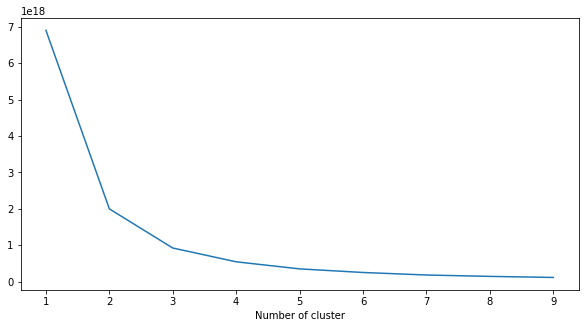

In [58]:
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6032769490289073
For n_clusters = 3 The average silhouette_score is : 0.5686481496903487
For n_clusters = 4 The average silhouette_score is : 0.5518813559244357
For n_clusters = 5 The average silhouette_score is : 0.5475092194232903
For n_clusters = 6 The average silhouette_score is : 0.5416589896813826
For n_clusters = 7 The average silhouette_score is : 0.5447902640181345
For n_clusters = 8 The average silhouette_score is : 0.5371416508399001
For n_clusters = 9 The average silhouette_score is : 0.537757068545949


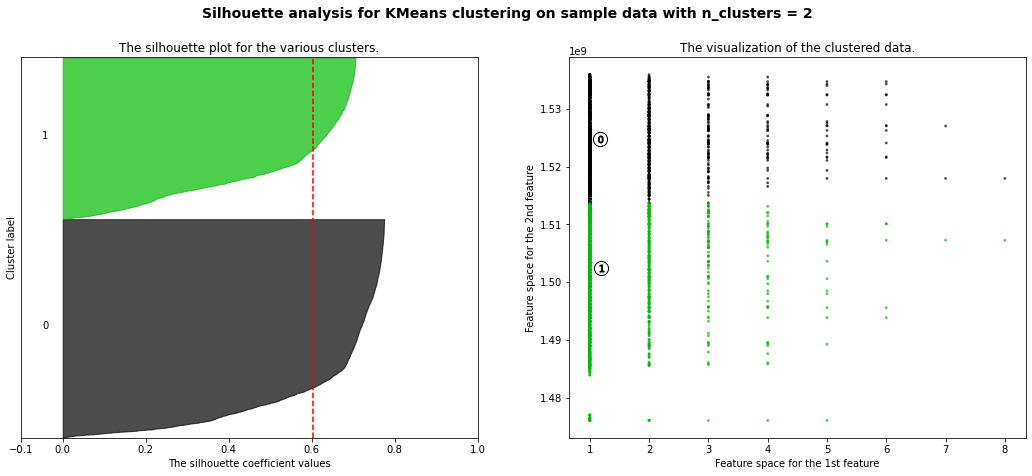

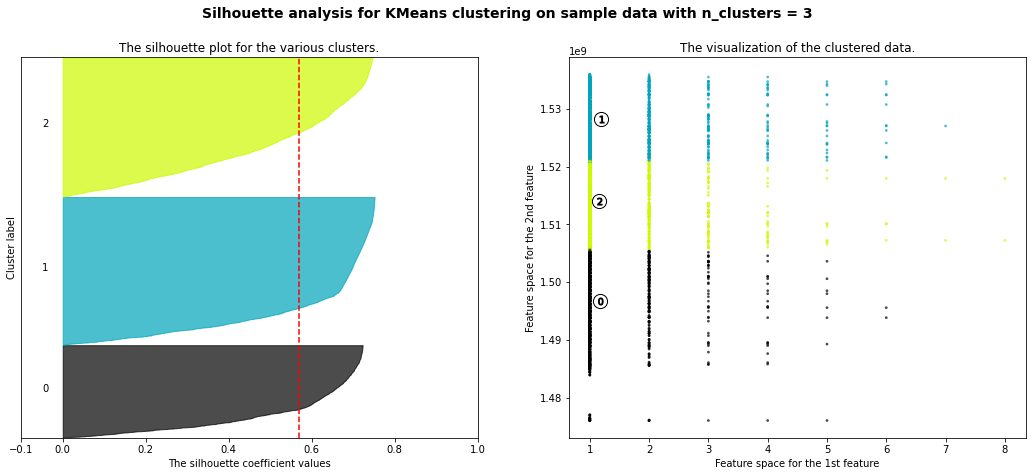

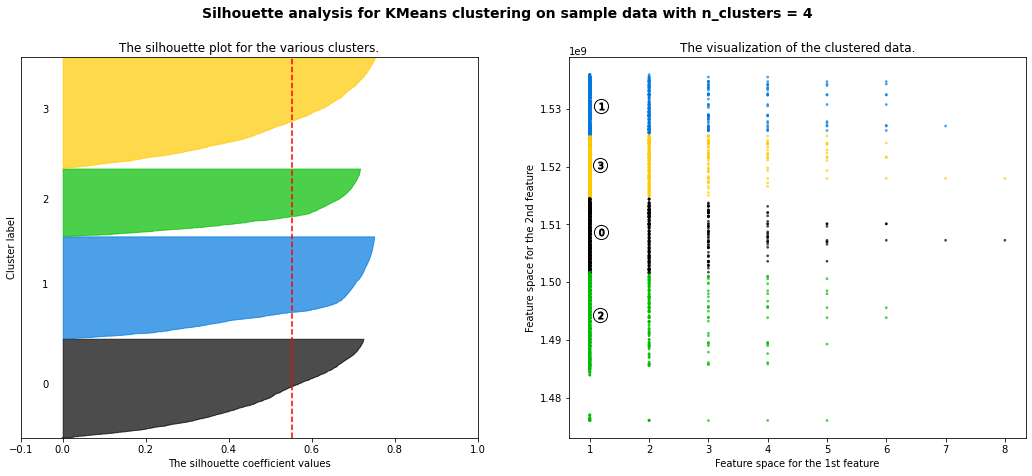

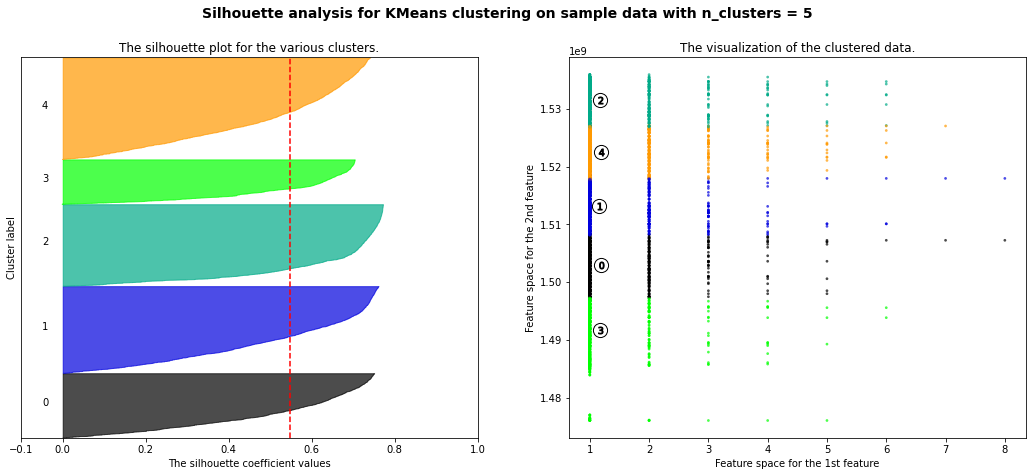

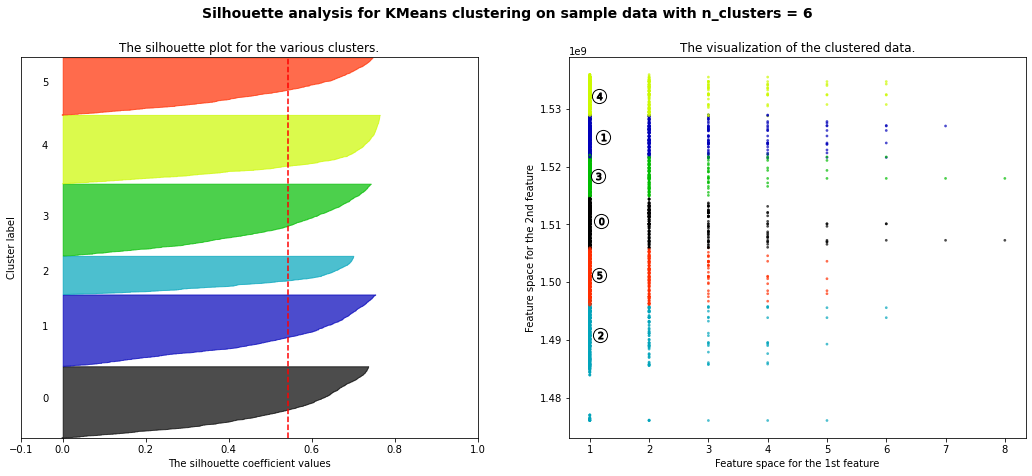

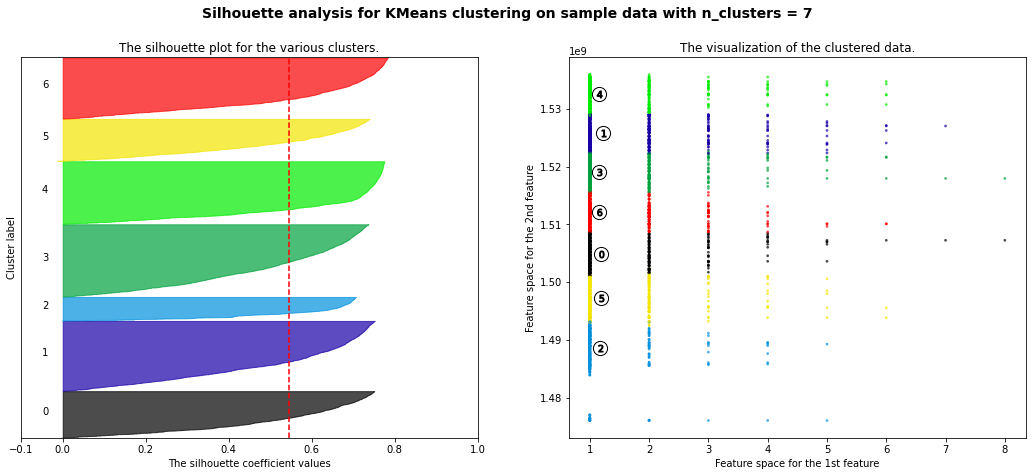

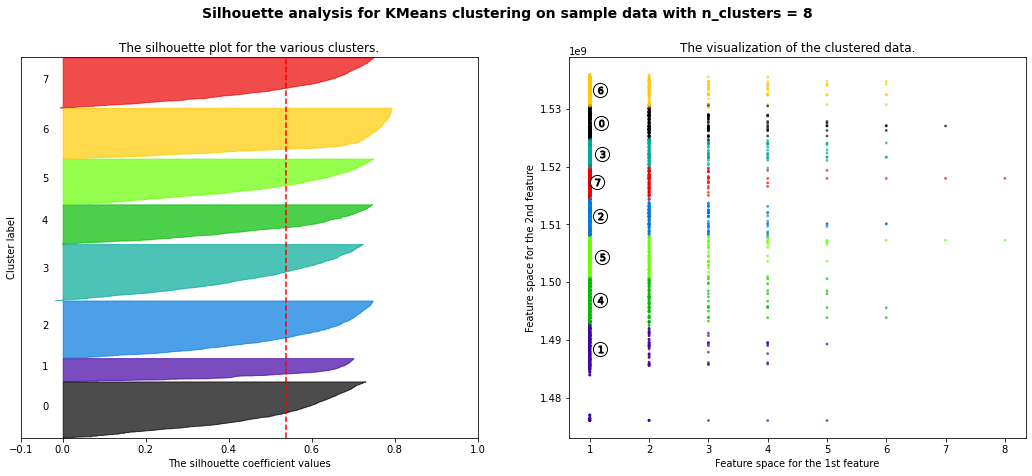

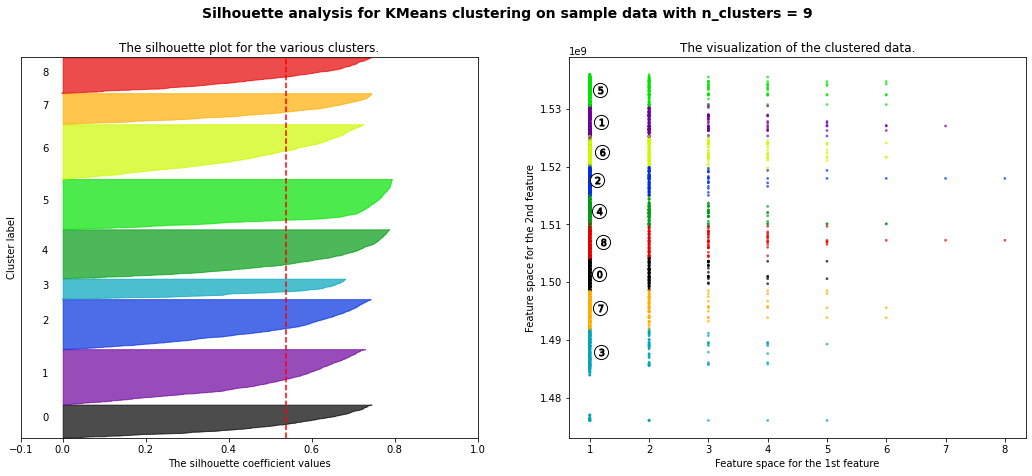

In [72]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [86]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans_labels = kmeans.fit_predict(X)

In [87]:
from sklearn.metrics import davies_bouldin_score

In [88]:
davies_bouldin_score(X, kmeans_labels)

0.5261697107178089

le davies bouldin score nous indique la similarité entre nos clusters

### DBscan

In [85]:
from sklearn.cluster import DBSCAN

In [100]:
dbscan = DBSCAN(eps=1, min_samples=2)
dbscans_labels = dbscan.fit_predict(X)

In [101]:
silhouette_score(X, dbscans_labels)

-0.6783881451249908

In [102]:
davies_bouldin_score(X, dbscans_labels)

2.3756666599451